In [1]:
from PIL import Image
import numpy as np
import os
if os.name == "nt":
    import msvcrt
else:
    import tty
    import termios
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 as cv
import random
from math import log
import pandas
# from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [2]:
def get_image_color(imageName):
    return cv.imread(imageName,cv.IMREAD_COLOR)
def get_image_gray(imageName):
    return cv.imread(imageName,cv.IMREAD_GRAYSCALE)
def get_image_matrix_color(imageName):
    # 顺序为B G R
    return cv.imread(imageName,cv.IMREAD_COLOR)
def get_image_matrix_gray(imageName):
    return cv.imread(imageName,cv.IMREAD_GRAYSCALE)

def get_image_matrix(imageName,color):
    if color:
        return get_image_matrix_color(imageName)
    else:
        return get_image_matrix_gray(imageName)

def get_image_rgb(imageName):
    img = cv.imread(imageName)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j][0],img[i][j][2] = img[i][j][2],img[i][j][0]
    return img
def get_image_bgr(imageName):
    return get_image_color(imageName)

In [3]:
# 一维rgb数组
def get_rgb_arr(img):
    rows,cols,n = img.shape
    r = []
    g = []
    b = []
    for i in range(0,rows):
        for j in range(0,cols):
            r.append(img[i][j][2])
            g.append(img[i][j][1])
            b.append(img[i][j][0])
    return r,g,b
# 二维rgb数组
def get_rgb_arr2(img):
    rows,cols,n = img.shape
    r = []
    g = []
    b = []
    for i in range(0,rows):
        rtmp = []
        gtmp = []
        btmp = []
        for j in range(0,cols):
            rtmp.append(img[i][j][2])
            gtmp.append(img[i][j][1])
            btmp.append(img[i][j][0])
        r.append(rtmp)
        g.append(gtmp)
        b.append(btmp)
    return r,g,b


In [4]:
# mat = get_image_matrix_color("./graphs/orig.png")
# print(mat)
# print(mat.size)
# cv.imshow("1",mat)
# cv.waitKey(0)
# cv.destroyAllWindows()
# print("==============")
# mat = get_image_matrix_gray("./graphs/orig.png")
# print(mat)
# print(mat.size)
# cv.imshow("1",mat)
# cv.waitKey(0)
# cv.destroyAllWindows()

# 确定一维和二维数组数据相同
def assert_arr1_eq_arr2(arr1,arr2):
    idx1 = 0
    for i in range(0,250):
        for j in range(0,250):
            if arr2[i][j] != arr1[idx1]:
                return False
            idx1 += 1    
    return True


def assert_img_equal(name1,name2,color):
    times = 0
    img1 = get_image_matrix(name1,color)
    img2 = get_image_matrix(name2,color)
    assert(img1.shape == img2.shape)
    if color:
        width,length,_ = img1.shape
    else:
        width,length = img1.shape
    if color:
        for i in range(width):
            for j in range(length):
                if(img1[i][j][0] != img2[i][j][0] or img1[i][j][1] != img2[i][j][1] or img1[i][j][2] != img2[i][j][2]):
                    # print('{img1[{0}][{1}] == {2} img2[{0}][{1}] == {3}}'.format(i,j,img1[i][j],img2[i][j]))
                    print('img1[{0}][{1}] == {2} img2[{0}][{1}] == {3}'.format(i,j,img1[i][j],img2[i][j]))
                    # return False
                    times += 1
    else:
        for i in range(width):
            for j in range(length):
                if(img1[i][j] != img2[i][j]):
                    print('img1[{0}][{1}] == {2} img2[{0}][{1}] == {3}'.format(i,j,img1[i][j],img2[i][j]))
                    # return False
                    times += 1
    if times == 0:
        print('equal')
    return times

img = get_image_matrix_color("./graphs/orig.png")
r,g,b = get_rgb_arr(img) # 一维
r2,g2,b2 = get_rgb_arr2(img) # 二维

print(assert_arr1_eq_arr2(r,r2))
print(assert_arr1_eq_arr2(g,g2))
print(assert_arr1_eq_arr2(b,b2))



True
True
True


## Histogram Analysis
The ciphertext image histogram analysis is one of the most straight-forward methods ofillustrating the image encryption quality. A good image encryption method tends to encrypt a plaintext image to a random incomprehensible form. Thus a good image encyption technique generates a cipher image that has a uniformly distributed intensity histogram.

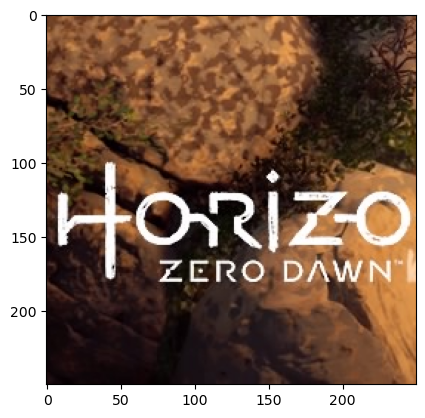

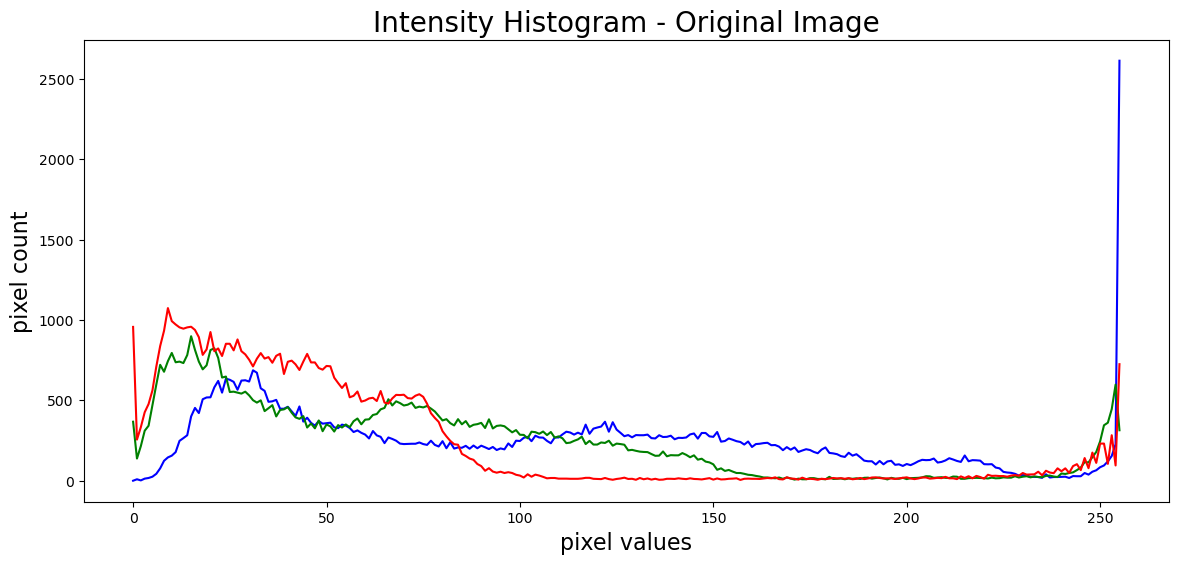

In [5]:
# origin
# cv.imread 列为BGR
# 获得RGB数组
img_rgb = get_image_rgb("graphs\orig.png")
# cv.imshow 数组为BGR  plt.imshow数组为RGB
# Image.open 数组为RGB
# pil_im = Image.open("graphs\orig.png", 'r')
# print(np.asarray(pil_im) == img_rgb)
cv.imshow("rgb",img_rgb)
cv.waitKey(0)
cv.destroyAllWindows()
plt.imshow(img_rgb)
# print(img_rgb)
plt.figure(figsize=(14,6))
histogram_blue = cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv.calcHist([img],[0],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

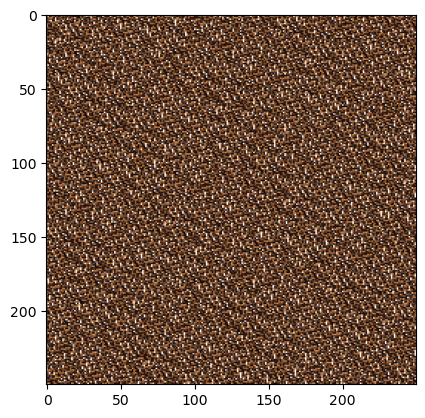

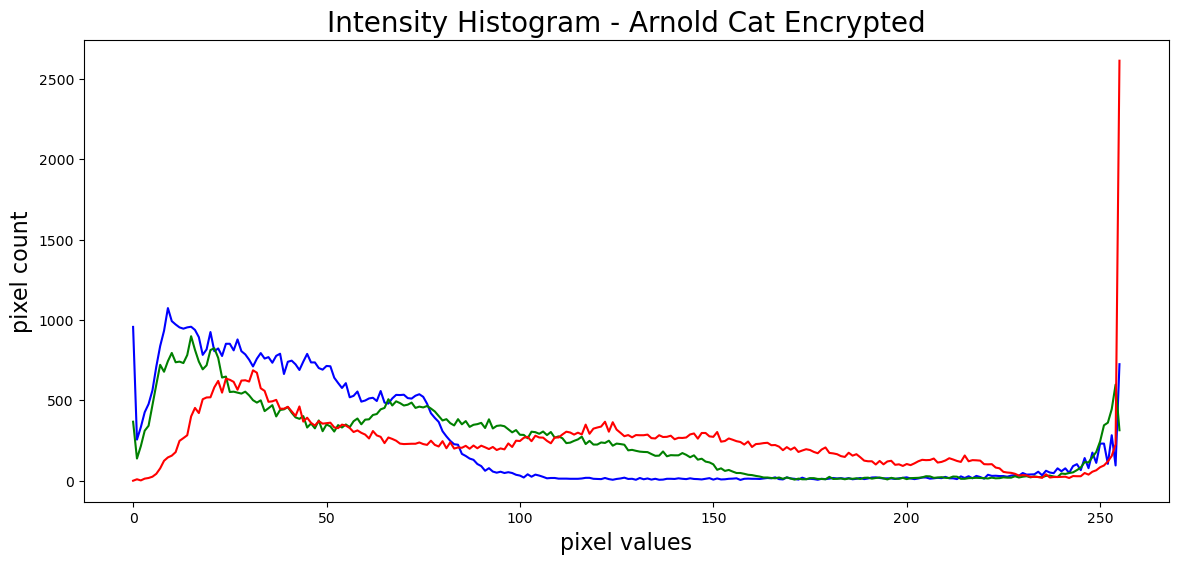

In [6]:
# encryption
img = get_image_rgb("graphs\orig_ArnoldcatEnc.png")
# cv.imshow("1",img)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(img)
plt.figure(figsize=(14,6))
histogram_blue = cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv.calcHist([img],[0],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Arnold Cat Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

## Adjacent Pixel Auto-Correlation
Since images exhibit high information redundancy, it is desirable to have an encryption algorithm that breaks this redundancy. Thus as a metric of encryption performance we find the correlation between adjacent pixels in a direction (Horizontal, Vertical or Diagonal). We have considered the Horizontal direction. 

1024 random pixels are picked up from the image and its correlation between it's rightmost neighbour is found and plotted. For a good algorithm, the correlation plot should appear random with no discernable pattern

250 250


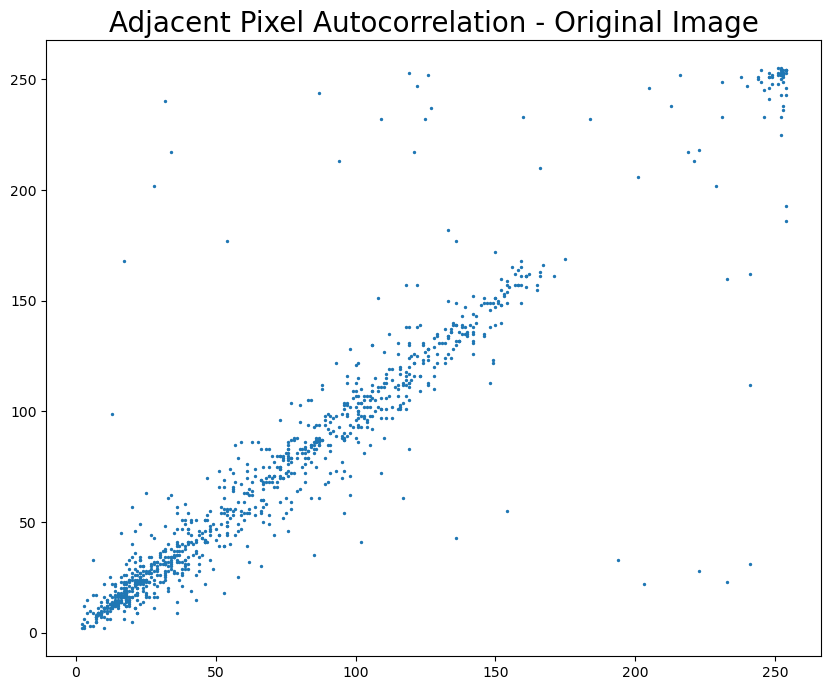

In [7]:
image_matrix = get_image_matrix_gray("graphs\orig.png")
x,y = image_matrix.shape
print(x,y)
samples_x = []
samples_y = []
for i in range(1024):
  _x = random.randint(0,x-2)
  _y = random.randint(0,y-1)
  samples_x.append(image_matrix[_x][_y])
  samples_y.append(image_matrix[_x+1][_y])
# print(samples_x)
# print(samples_y)
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

250 250


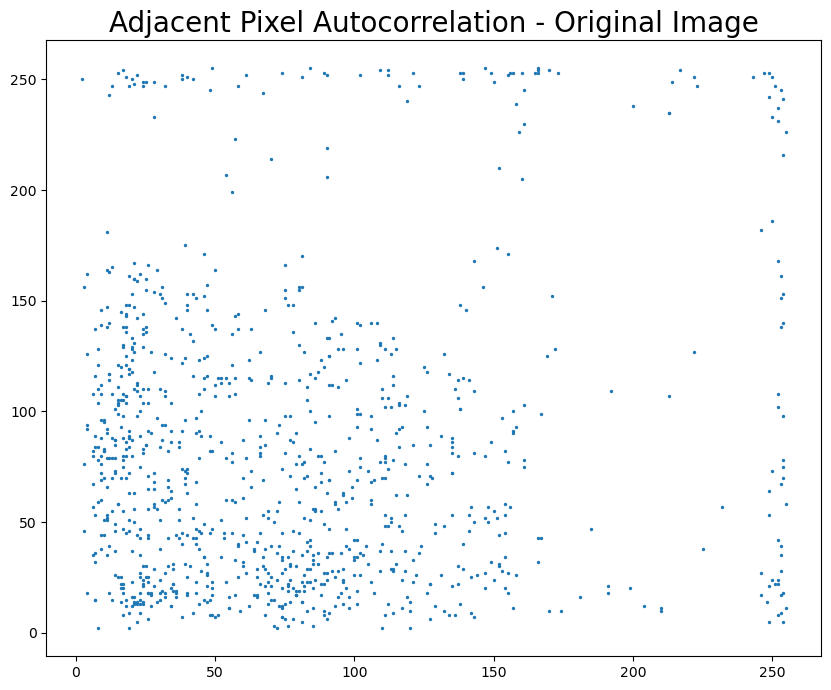

In [8]:
image_matrix = get_image_matrix_gray("graphs\orig_ArnoldcatEnc.png")
x,y = image_matrix.shape
print(x,y)
samples_x = []
samples_y = []
for i in range(1024):
  _x = random.randint(0,x-2)
  _y = random.randint(0,y-1)
  samples_x.append(image_matrix[_x][_y])
  samples_y.append(image_matrix[_x+1][_y])
# print(samples_x)
# print(samples_y)
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

## Henon Map
$$X_{n+1} =  1 − aX_n^2 + Y_n $$

$$Y_{n+1} = bX_n$$
a = 1.4 b = 0.3

In [9]:
# 将比特序列转化为数值
def trans_to_decimal(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [10]:
def generate_henon_map(dimension, key):
    x = key[0]
    y = key[1]
    sequenceSize =  8 * dimension**2 # 图像比特数
    bit_array = []  # Each bitSequence contains 8 bits
    # Each byteArray contains m( i.e 512 in this case) bitSequence
    byte_array = []
    # Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    image_matrix = []
    for i in range(sequenceSize):
        xN = 1 - 1.4 * x**2 + y
        yN = 0.3 * x

        x = xN
        y = yN

        # if xN <= 0.4:
        #     bit = 0
        # else:
        #     bit = 1
        bit = xN > 0.4
        try:
            bit_array.append(bit)
        except:
            bit_array = [bit]

        if i % 8 == 7:
            decimal = trans_to_decimal(bit_array)
            try:
                byte_array.append(decimal)
            except:
                byte_array = [decimal]
            # bit_array.clear()
            bit_array = []

        byte_array_size = dimension * 8
        if i % byte_array_size == byte_array_size - 1:
            try:
                image_matrix.append(byte_array)
            except:
                image_matrix = [byte_array]
            # byte_array.clear()
            byte_array = []
    return image_matrix


In [11]:
print(generate_henon_map(250,(0.1,0.1)))

[[168, 232, 167, 69, 63, 234, 167, 170, 169, 85, 78, 135, 71, 245, 71, 79, 170, 170, 157, 42, 169, 85, 42, 116, 85, 93, 82, 167, 85, 82, 170, 168, 232, 232, 116, 116, 232, 232, 116, 254, 133, 83, 165, 84, 170, 84, 169, 209, 74, 167, 84, 169, 211, 209, 79, 244, 85, 79, 162, 149, 20, 170, 170, 84, 116, 42, 170, 165, 85, 20, 170, 170, 116, 170, 167, 234, 162, 149, 93, 20, 170, 170, 149, 84, 169, 250, 170, 169, 209, 83, 163, 255, 69, 82, 167, 84, 232, 232, 84, 171, 165, 78, 142, 149, 84, 168, 232, 169, 83, 163, 170, 58, 42, 165, 85, 85, 83, 250, 58, 58, 63, 167, 85, 29, 85, 93, 81, 208, 170, 116, 58, 85, 85, 71, 79, 69, 83, 162, 162, 149, 79, 163, 170, 162, 149, 58, 165, 78, 157, 21, 209, 211, 208, 170, 157, 21, 42, 149, 63, 245, 85, 82, 174, 157, 10, 149, 62, 138, 157, 58, 170, 58, 21, 62, 138, 165, 85, 62, 157, 10, 167, 69, 78, 157, 58, 63, 69, 42, 43, 167, 71, 69, 85, 78, 149, 58, 41, 234, 149, 58, 42, 149, 42, 186, 149, 81, 208, 232, 169, 81, 85, 83, 162, 186, 85, 84, 170, 170, 116, 83

In [12]:
def henon_encryption(imageName, key, color):
    if color:
        image_matrix = get_image_matrix_color(imageName)
        dimensionX, dimensionY, x = image_matrix.shape
    else:
        image_matrix = get_image_matrix_gray(imageName)
        dimensionX, dimensionY = image_matrix.shape
    trans_matrix = generate_henon_map(dimensionX, key)
    result_matrix = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(
                        tuple([trans_matrix[i][j] ^ x for x in image_matrix[i][j]]))
                else:
                    row.append(trans_matrix[i][j] ^ image_matrix[i][j])
            except:
                if color:
                    row = [
                        tuple([trans_matrix[i][j] ^ x for x in image_matrix[i][j]])]
                else:
                    row = [trans_matrix[i][j] ^ x for x in image_matrix[i][j]]
        try:
            result_matrix.append(row)
        except:
            result_matrix = [row]

    if color:
        # im = Image.new("RGB", (dimensionX, dimensionY))
        im = np.zeros((dimensionX, dimensionY, x))
    else:
        # im = Image.new("L", (dimensionX, dimensionY))
        im = np.zeros((dimensionX, dimensionY))
    for x in range(dimensionX):
        for y in range(dimensionY):
            im[x, y] = result_matrix[x][y]
    if color:
        cv.imwrite(imageName.split('.')[0] + "_Color_HenonEnc.png", im)
    else:
        cv.imwrite(imageName.split('.')[0] + "_Gray_HenonEnc.png", im)


In [13]:
def henon_decryption(imageName, key, color):
    if color:
        image_matrix = get_image_matrix_color(imageName)
        dimensionX, dimensionY, x = image_matrix.shape
    else:
        image_matrix = get_image_matrix_gray(imageName)
        dimensionX, dimensionY = image_matrix.shape
    trans_matrix = generate_henon_map(dimensionX, key)
    result_matrix = []
    henon_decrypted_image = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(
                        tuple([trans_matrix[i][j] ^ x for x in image_matrix[i][j]]))
                else:
                    row.append(trans_matrix[i][j] ^ image_matrix[i][j])
            except:
                if color:
                    row = [
                        tuple([trans_matrix[i][j] ^ x for x in image_matrix[i][j]])]
                else:
                    row = [trans_matrix[i][j]
                           ^ x for x in image_matrix[i][j]]
        try:
            henon_decrypted_image.append(row)
        except:
            henon_decrypted_image = [row]
    if color:
        dec_img = np.zeros((dimensionX, dimensionY, x))
    else:
        dec_img = np.zeros((dimensionX, dimensionY))
    for x in range(dimensionX):
        for y in range(dimensionY):
            dec_img[x, y] = henon_decrypted_image[x][y]
    if color:
        cv.imwrite(imageName.split('_')[0] + "_Color_HenonDec.png", dec_img)
    else:
        cv.imwrite(imageName.split('_')[0] + "_Gray_HenonDec.png", dec_img)

    


In [14]:
henon_encryption("graphs\henon\orig.png",(0.1,0.1),False)
henon_decryption("graphs\henon\orig_Gray_HenonEnc.png",(0.1,0.1),False)

henon_encryption("graphs\henon\orig.png",(0.1,0.1),True)
henon_decryption("graphs\henon\orig_Color_HenonEnc.png",(0.1,0.1),True)

In [15]:
# arr = [1, 2, 3, 4]
# arr.clear()
# print(arr)
# print(cv.IMREAD_COLOR)
# arr.append(tuple(1 ^ x for x in range(10)))  # 0-9每个与1 xor
# print(arr)

# arr = [[1, 2, 3], [4, 5, 6]]
# # arr[0] = arr[0] ^ 1
# x = tuple(1 ^ x for x in arr[0])
# w = np.zeros((250, 250, 3))
# w = np.zeros((250, 250))
# w


## Histogram
### Original Image

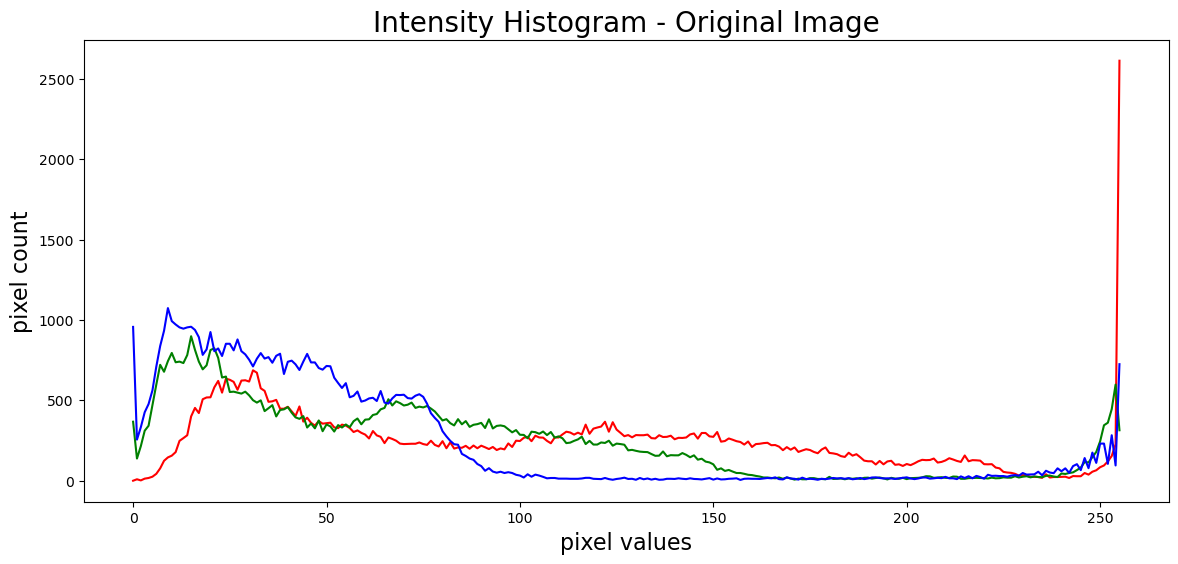

In [16]:
# color
img = get_image_rgb("graphs\henon\orig.png")
cv.imshow("henon_orig.png",get_image_color("graphs\henon\orig.png"))
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure(figsize=(14,6))
hist_red = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_red,color = 'red')
histogram_green = cv.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_blue = cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.savefig("graphs\henon\orig_color_hist.png")
plt.show()

[[ 60  68  77 ...  84  70  71]
 [ 58  68  77 ...  79  72  76]
 [ 70  75  73 ...  85  80  83]
 ...
 [ 15  19  21 ... 142 134 125]
 [ 13  16  18 ... 137 132 124]
 [ 11  13  14 ... 132 129 122]]


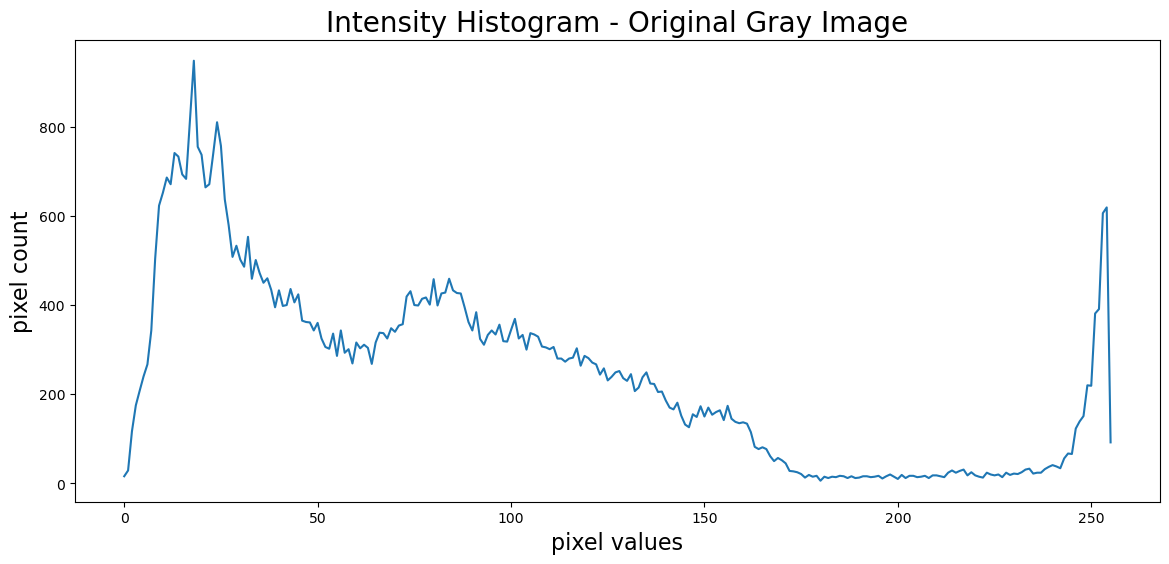

In [17]:
# gray
img = get_image_gray("graphs\henon\orig.png")

plt.figure(figsize=(14,6))
print(img)
hist_gray = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_gray)
plt.title('Intensity Histogram - Original Gray Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.savefig("graphs\henon\orig_gray_hist.png")
plt.show()

### Encrypted Image

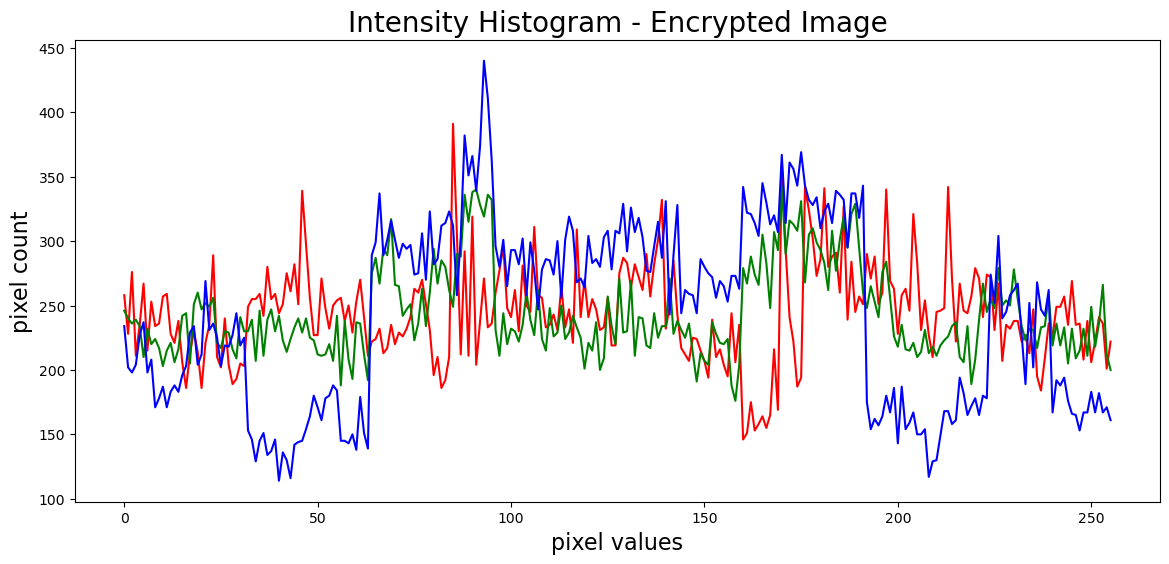

In [18]:
# color
img = get_image_rgb("graphs\henon\orig_Color_HenonEnc.png")
cv.imshow("henon_enc_color.png",img)
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure(figsize=(14,6))
hist_red = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_red,color = 'red')
histogram_green = cv.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_blue = cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
plt.title('Intensity Histogram - Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
# plt.show()以前savefig，否则图像空白
plt.savefig("graphs\henon\orig_color_enc_hist.png")
plt.show()

[[148 172 234 ...   1   9 237]
 [147 149 176 ... 230  29 102]
 [219 113  96 ...  16 122 206]
 ...
 [229  71 191 ... 219 210 215]
 [144  58 181 ... 218  45  47]
 [241  55  39 ... 174  40  47]]


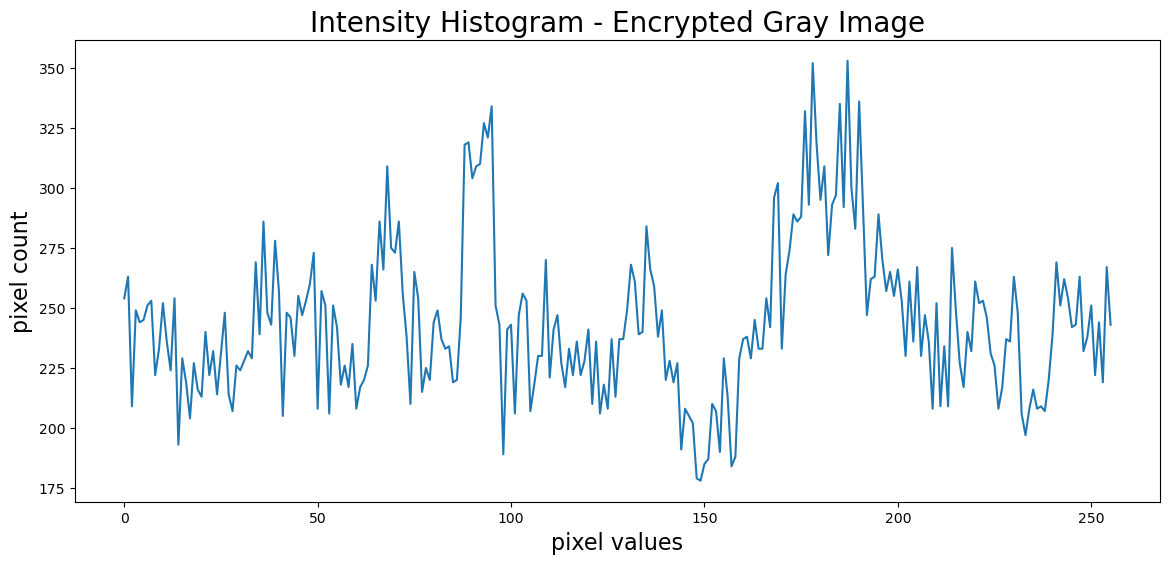

In [19]:
# gray
img = get_image_gray("graphs\henon\orig_Gray_HenonEnc.png")

plt.figure(figsize=(14,6))
print(img)
hist_gray = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_gray)
plt.title('Intensity Histogram - Encrypted Gray Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.savefig("graphs\henon\orig_gray_enc_hist.png")
plt.show()

## Adjacent Pixel AutoCorrelation

### Original Image

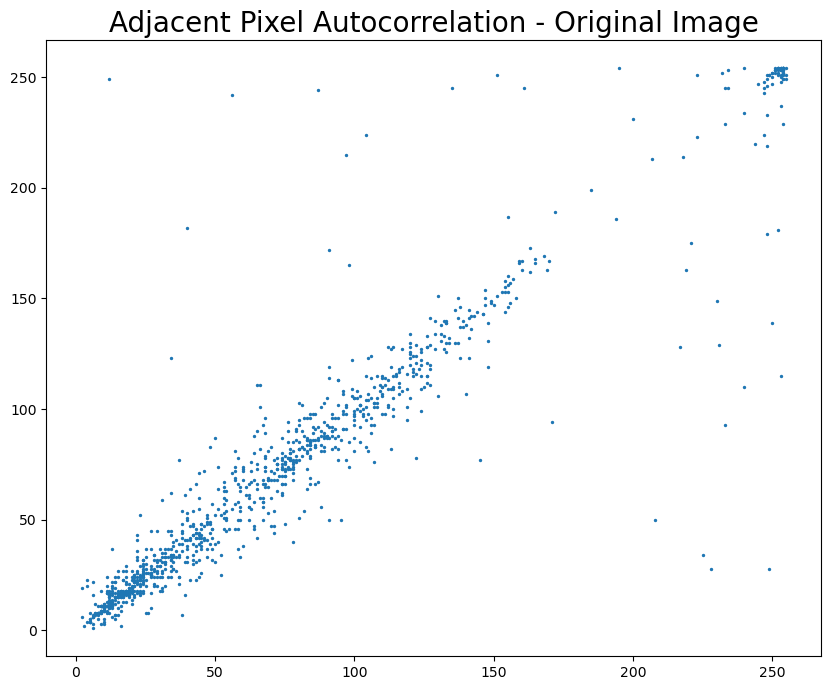

In [20]:
image_matrix = get_image_matrix_gray("graphs\orig.png")
width,length = image_matrix.shape
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,width-2)
  y = random.randint(0,length-1)
  samples_x.append(image_matrix[x][y])
  samples_y.append(image_matrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.savefig("graphs\henon\orig_apac.png")
plt.show()

### Encrypted Image

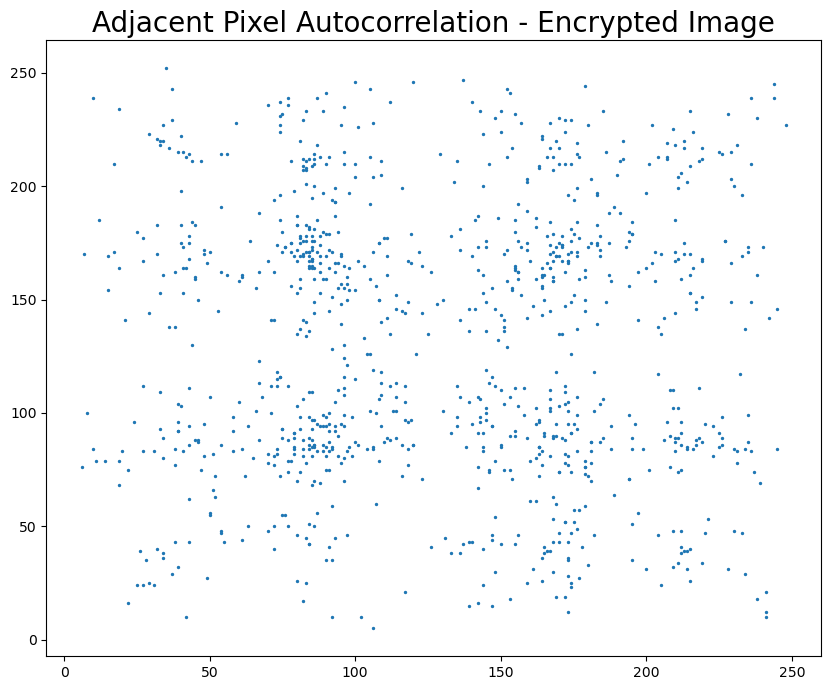

In [21]:
image_matrix = get_image_matrix_gray("graphs\henon\orig_Color_HenonEnc.png")
width,length = image_matrix.shape
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,width-2)
  y = random.randint(0,length-1)
  samples_x.append(image_matrix[x][y])
  samples_y.append(image_matrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Encrypted Image', fontsize=20)
plt.savefig("graphs\henon\orig_enc_apac.png")
plt.show()

# Logistic Maps

$$X_{t+1} = rX_t(1-X_t)$$

In [22]:
def logistic_encryption(imageName, key, color):
    N = 256
    key_list = [ord(x) for x in key]
    # G 3*4
    G = [key_list[0:4], key_list[4:8], key_list[8:12]]
    print("G = ",G)
    g = []
    R = 1
    # g = [...,...,...]
    # g 每个值为每行 0.1*G[i][0] + 0.01*G[i][1] + 0.001*G[i][2] + 0.0001*G[i][3]
    # R 为 1 * g[0] * g[1] * g[2] 每次相乘都mod 1
    for i in range(1, 4):
        s = 0
        for j in range(1, 5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1
    print("g == ",g)
    print("R == ",R)
    print(key_list[12])
    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L * (10**4)) % 256)
    print('?',((g[0]+g[1]+g[2])*(10**4) + L * (10**4)))
    print('?',((g[0]+g[1]+g[2])*(10000) + L * (10000)))
    # V1 key_list ASCII值总和
    # V2 == G每个值异或
    # V = 前13位key_list异或 / key_list之和
    # L_y = (V+key_list[12]/256) % 1
    V2 = key_list[0]
    for i in range(1, 13):
        V2 = V2 ^ key_list[i]

    V = V2/sum(key_list)
    print('V2 = ',V2)
    print('V = ',V)
    L_y = (V+key_list[12]/256) % 1
    print('L_y = ',L_y)
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = C
    C_g = C
    C_b = C
    # print(C,' ',C_r)
    print('S_x == ', S_x)
    print('S_y == ', S_y)
    # 当前S_x S_y是logist map的初始值 由key决定
    # μ为4
    x = 4*(S_x)*(1-S_x)
    y = 4*(S_y)*(1-S_y)
    print('x == ', x, 'y == ', y)
    if color:
        # image_matrix = get_image_matrix_color(imageName)
        image_matrix = get_image_rgb(imageName)
        dimensionX, dimensionY, _ = image_matrix.shape
    else:
        image_matrix = get_image_matrix_gray(imageName)
        dimensionX, dimensionY = image_matrix.shape
    logistic_enc_img = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            # x y 迭代到[0.2,0.8]区间之外
            while x < 0.8 and x > 0.2:
                x = 4 * x * (1-x)
            while y < 0.8 and y > 0.2:
                y = 4 * y * (1-y)
            # print(x, ' ', y)
            # x y 应该是小数，将其乘10000后取模到[0,255] 为 x_round y_round
            x_round = round((x*(10**4)) % 256)
            y_round = round((y*(10**4)) % 256)
            # C1 C2由x_round y_round决定
            # C_r C_g C_b 由C1 C2决定
            C1 = x_round ^ ((key_list[0]+x_round) %
                            N) ^ ((C1_0 + key_list[1]) % N)
            C2 = x_round ^ ((key_list[2]+y_round) %
                            N) ^ ((C2_0 + key_list[3]) % N)
            if color:
                C_r = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (key_list[6]+image_matrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
                C_g = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (key_list[6]+image_matrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
                C_b = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (key_list[6]+image_matrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
                # 注意opencv是bgr
                row.append((C_b, C_g, C_r))
                C = C_r

            else:
                C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) %
                                              N) ^ ((key_list[6]+image_matrix[i][j]) % N) ^ ((C + key_list[7]) % N)
                row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            # 每轮更新key_list
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
            # print('key_list = ',key_list)
        logistic_enc_img.append(row)
    # print(dimensionX,dimensionY,x)
    if color:
        im = np.zeros((dimensionX, dimensionY, 3))
    else:
        im = np.zeros((dimensionX, dimensionY))

    for x in range(dimensionX):
        for y in range(dimensionY):
            im[x, y] = logistic_enc_img[x][y]
    cv.imwrite(imageName.split('.')[0] + "_LogisticEnc.png", im)


In [23]:
logistic_encryption("graphs\logistic\orig.png","13!@sadhyter?",1)

G =  [[49, 51, 33, 64], [115, 97, 100, 104], [121, 116, 101, 114]]
g ==  [5.449400000000001, 12.580400000000001, 13.372400000000003]
R ==  0.7406253474241282
63
? 323889.19097424136
? 323889.19097424136
V2 =  88
V =  0.07801418439716312
L_y =  0.3241079343971631
S_x ==  49
S_y ==  1
x ==  -9408 y ==  0


In [24]:
def logistic_decryption(imageName, key, color):
    # ==================same==============
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4], key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1, 4):
        s = 0
        for j in range(1, 5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x * (10**4)) % 256)
    V2 = key_list[0]
    for i in range(1, 13):
        V2 = V2 ^ key_list[i]
    V = V2/sum(key_list)

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    print("s_y = ",S_y, "l_y = ",L_y)
    C = round((L_x*L_y*10**4) % 256)
    # ===================================
    I_prev = C
    # 上一轮的rgb
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    # 当前的rgb
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    # y_prev = 4*(L_x)*(1-S_y)
    y_prev = 4*(S_y)*(1-S_y)
    x = x_prev
    y = y_prev
    print("x = ", x, "y = ", y)
    if color:
        image_matrix = get_image_rgb(imageName)
        # image_matrix = get_image_matrix_color(imageName)
        dimensionX, dimensionY, _ = image_matrix.shape
    else:
        image_matrix = get_image_matrix_gray(imageName)
        dimensionX, dimensionY = image_matrix.shape
    logistic_dec_image = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            # print("x = ", x, "y = ", y)
            # while x < 0.8 and x > 0.2:
            #     x = 4 * x * (1-x)
            # while y < 0.8 and y > 0.2:
            #     y = 4 * y * (1-y)
            while (x < 0.8) and (x > 0.2):
                x = 4 * x * (1-x)
            while y < 0.8 and y > 0.2:
                y = 4 * y * (1-y)
            x_round = round((x*(10**4)) % 256)
            y_round = round((y*(10**4)) % 256)
            C1 = x_round ^ ((key_list[0]+x_round) %
                            N) ^ ((C1_0 + key_list[1]) % N)
            C2 = x_round ^ ((key_list[2]+y_round) %
                            N) ^ ((C2_0 + key_list[3]) % N)
            if color:
                # I_r 就是加密过程的明文图像image_matrix[i][j][0] [1] [2]
                # 将各表达式放在左边即可
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (I_prev_r + key_list[7]) % N) ^ image_matrix[i][j][0]) + N-key_list[6]) % N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (I_prev_g + key_list[7]) % N) ^ image_matrix[i][j][1]) + N-key_list[6]) % N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (I_prev_b + key_list[7]) % N) ^ image_matrix[i][j][2]) + N-key_list[6]) % N
                # 更新上一轮的rgb
                I_prev_r = image_matrix[i][j][0]
                I_prev_g = image_matrix[i][j][1]
                I_prev_b = image_matrix[i][j][2]
                # 注意opencv是bgr
                row.append((I_b, I_g, I_r))
                x = (x +  image_matrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  image_matrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1 
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^
                      ((I_prev+key_list[7]) % N) ^ image_matrix[i][j]) + N-key_list[6]) % N
                I_prev = image_matrix[i][j]
                row.append(I)
                x = (x +  image_matrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  image_matrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            # 更新x y 和加密过程一样
            # x = (x + image_matrix[i][j]/256 +
            #      key_list[8]/256 + key_list[9]/256) % 1
            # y = (x + image_matrix[i][j]/256 +
            #      key_list[8]/256 + key_list[9]/256) % 1
            # 同加密流程一样，迭代key_list
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
            # print("end x = ", x, "y = ", y)
        logistic_dec_image.append(row)
    if color:
        im = np.zeros((dimensionX, dimensionY, 3))
    else:
        im = np.zeros((dimensionX, dimensionY))

    for x in range(dimensionX):
        for y in range(dimensionY):
            im[x, y] = logistic_dec_image[x][y]
    cv.imwrite(imageName.split('.')[0] + "_LogisticDec.png", im)
    # if color:
    #     im = Image.new("RGB", (dimensionX, dimensionY))
    # else:
    #     im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels
    # pix = im.load()
    # for x in range(dimensionX):
    #     for y in range(dimensionY):
    #         pix[x, y] = henonDecryptedImage[x][y]
    # im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")


In [32]:
def substitution_1(img):
    x, y, _ = img.shape
    # print(x/2 * y/2)
    s_img = img.copy()
    lt_x = 0
    lt_y = 0
    rt_x = 0
    rt_y = y-1
    lb_x = x-1
    lb_y = 0
    rb_x = x-1
    rb_y = y-1
    curr_x = 0
    curr_y = 0
    for i in range(int(x/2 * y/2)):
        s_img[curr_x][curr_y] = img[lt_x][lt_y]
        s_img[curr_x][curr_y+1] = img[rt_x][rt_y]
        s_img[curr_x+1][curr_y] = img[lb_x][lb_y]
        s_img[curr_x+1][curr_y+1] = img[rb_x][rb_y]
        if lt_y == y/2 - 1:
            lt_x += 1
            lt_y = 0
        else:
            lt_y += 1
        if rt_x == x/2 - 1:
            rt_x = 0
            rt_y -= 1
        else:
            rt_x += 1
        if rb_y == y/2:
            rb_x -= 1
            rb_y = y-1
        else:
            rb_y -= 1
        if lb_x == x/2:
            lb_x = x-1
            lb_y += 1
        else:
            lb_x -= 1
        if curr_y+2 == y:
            curr_x += 2
            curr_y = 0
        else:
            curr_y += 2
    # print(lt_x,' ',lt_y)
    # print(rt_x,' ',rt_y)
    return s_img


def reverse_substitution_1(img):
    rs_img = img.copy()
    x, y, _ = img.shape
    lt_x = 0
    lt_y = 0
    rt_x = 0
    rt_y = y-1
    lb_x = x-1
    lb_y = 0
    rb_x = x-1
    rb_y = y-1
    curr_x = 0
    curr_y = 0
    for i in range(int(x/2 * y/2)):
        rs_img[lt_x][lt_y] = img[curr_x][curr_y]
        rs_img[rt_x][rt_y] = img[curr_x][curr_y+1]
        rs_img[lb_x][lb_y] = img[curr_x+1][curr_y]
        rs_img[rb_x][rb_y] = img[curr_x+1][curr_y+1]
        if lt_y == y/2 - 1:
            lt_x += 1
            lt_y = 0
        else:
            lt_y += 1
        if rt_x == x/2 - 1:
            rt_x = 0
            rt_y -= 1
        else:
            rt_x += 1
        if rb_y == y/2:
            rb_x -= 1
            rb_y = y-1
        else:
            rb_y -= 1
        if lb_x == x/2:
            lb_x = x-1
            lb_y += 1
        else:
            lb_x -= 1
        if curr_y+2 == y:
            curr_x += 2
            curr_y = 0
            # print(curr_x,' ',curr_y)
        else:
            curr_y += 2
    return rs_img


def substitution_2(img):
    x, y, _ = img.shape
    # print(x/2 * y/2)
    s_img = img.copy()
    px, py = 0, 0  # 遍历img
    curr_x = 0
    curr_y = 0
    for i in range(int(x/2 * y/2)):
        s_img[curr_x][curr_y] = img[px][py]
        s_img[curr_x][curr_y+1] = img[px][py+int(y/2)]
        s_img[curr_x+1][curr_y] = img[px+int(x/2)][py]
        s_img[curr_x+1][curr_y+1] = img[px+int(x/2)][py+int(y/2)]
        if py == y/2-1:
            px += 1
            py = 0
        else:
            py += 1
        if curr_y+2 == y:
            curr_x += 2
            curr_y = 0
        else:
            curr_y += 2
    return s_img


def reverse_substitution_2(img):
    x, y, _ = img.shape
    rs_img = img.copy()
    px, py = 0, 0  # 遍历img
    curr_x = 0
    curr_y = 0
    for i in range(int(x/2 * y/2)):
        rs_img[px][py] = img[curr_x][curr_y]
        rs_img[px][py+int(y/2)] = img[curr_x][curr_y+1]
        rs_img[px+int(x/2)][py] = img[curr_x+1][curr_y]
        rs_img[px+int(x/2)][py+int(y/2)] = img[curr_x+1][curr_y+1]
        if py == y/2-1:
            px += 1
            py = 0
        else:
            py += 1
        if curr_y+2 == y:
            curr_x += 2
            curr_y = 0
        else:
            curr_y += 2
    return rs_img


In [50]:
img = cv.imread("D:\\C\\opencv\\sources\\modules\\java\\test\\common_test\\res\\drawable\\lena.png")
img.shape

(512, 512, 3)

In [54]:
# ========================================
# 测试对加密图像进行攻击，将加密图像一部分全改为单一颜色
# 该代码块只将明文进行置换，未进行代换
img = cv.imread('graphs\s-box\orig.png')

simg = img.copy()
# 置换次数 越多噪声分布越均匀
for i in range(10):
    simg = substitution_1(simg)
    simg = substitution_2(simg)
cv.imwrite('graphs\s-box\orig_10s.png',simg)
logistic_encryption('graphs\s-box\orig_10s.png',"13!1sadhyter?",1)
enc_img = cv.imread('graphs\s-box\orig_10s_LogisticEnc.png')
# 覆盖块
# enc_img[0:50][0:250] = 0
for i in range(1):
    for j in range(1):
        enc_img[i+50][j+50] = [0,0,0]
cv.imwrite('graphs\s-box\orig_after_enc_partly_dark.png',enc_img)
assert_img_equal('graphs\s-box\orig_after_enc_partly_dark.png','graphs\s-box\orig_10s_LogisticEnc.png',1)
partly_dark_img = cv.imread('graphs\s-box\orig_after_enc_partly_dark.png')
logistic_decryption('graphs\s-box\orig_after_enc_partly_dark.png',"13!1sadhyter?",1)
img = cv.imread('graphs\s-box\orig_after_enc_partly_dark_LogisticDec.png')
rsimg = img.copy()
for i in range(10):
    rsimg = reverse_substitution_2(rsimg)
    rsimg = reverse_substitution_1(rsimg)
    
cv.imshow('123',rsimg)
cv.waitKey(0)
cv.destroyAllWindows()
# logistic_decryption()
# cv.imwrite('graphs\s-box\orig_partly_black.png',img)

# ========================================

# img_part_black = cv.imread("graphs\logistic\orig_LogisticEnc.png",cv.IMREAD_COLOR)
# print(img_part_black.shape)
# print(img_part_black[0])
# for i in range(100):
#     for j in range(100):
#         img_part_black[i][j] = [0,0,0];
# cv.imwrite("graphs\logistic\orig_LogisticEnc_part_black_100.png",img_part_black)
# cv.imshow("123",img_part_black)
# cv.waitKey(0)
# cv.destroyAllWindows()
# print(img_part_black[0])
# logistic_decryption("graphs\logistic\orig_LogisticEnc_part_black_100.png","13!@sadhyter?",1)
# assert(get_image_color("graphs\logistic\orig.png") == get_image_color("graphs\logistic\orig_LogisticEnc_LogisticDec.png"))
# print(assert_img_equal("graphs\logistic\orig.png","graphs\logistic\orig_LogisticEnc_LogisticDec.png",1))
# # 就开始错了一位
# img1 = get_image_color("graphs\logistic\orig.png")
# img2 = get_image_color("graphs\logistic\orig_LogisticEnc_LogisticDec.png")
# img2
# assert_img_equal("E:\\rz\\chaos_enc_image\\image\\orig.png","E:\\rz\\chaos_enc_image\\image\\orig_logistic_enc_logistic_dec.png",1)
# assert_img_equal("E:\\rz\\chaos_enc_image\\image\\orig_henon_enc_henon_dec.png","E:\\rz\\chaos_enc_image\\image\\orig_logistic_enc_logistic_dec.png",1)

G =  [[49, 51, 33, 49], [115, 97, 100, 104], [121, 116, 101, 114]]
g ==  [5.447900000000001, 12.580400000000001, 13.372400000000003]
R ==  0.4882801359841089
63
? 321350.73885984113
? 321350.73885984113
V2 =  41
V =  0.036837376460017966
L_y =  0.28293112646001795
S_x ==  71
S_y ==  54
x ==  -19880 y ==  -11448
img1[50][50] == [0 0 0] img2[50][50] == [ 81 168  52]
s_y =  54 l_y =  0.28293112646001795
x =  -19880 y =  -11448


In [27]:
# img = get_image_matrix_color("graphs\logistic\orig_LogisticEnc.png")
one_pixel_change_img = get_image_matrix_color("graphs\logistic\orig_LogisticEnc.png")
print(one_pixel_change_img[0])
one_pixel_change_img[0][0] = 100
# print(one_pixel_change_img[0])
cv.imwrite("graphs\logistic\orig_LogisticEnc_onepixel_change.png",one_pixel_change_img)


logistic_decryption("graphs\logistic\orig_LogisticEnc_onepixel_change.png","13!@sadhyter?",1)

[[144 121  44]
 [211 145 105]
 [  9 208  86]
 [184  84 160]
 [181  68 253]
 [159   9 135]
 [249  60  99]
 [124  26 180]
 [247  50  90]
 [ 79 228 105]
 [189 200 142]
 [111  63 117]
 [ 36 157 139]
 [136  39 114]
 [143 199  53]
 [235 216 241]
 [152  94  12]
 [ 55  90  32]
 [210  35  31]
 [247 111 191]
 [184  33  79]
 [170  34 159]
 [ 13 224 178]
 [166 180 180]
 [106   7  53]
 [166  23  52]
 [255 162 180]
 [ 56 117  86]
 [213 180 200]
 [210 151  12]
 [157 118  12]
 [105 241  73]
 [197 110 116]
 [148 172 151]
 [106 147 218]
 [247 253 249]
 [ 64  71 112]
 [ 40  49 169]
 [223  53 235]
 [ 19 181 193]
 [159 199   9]
 [ 85  85  94]
 [116  76 108]
 [ 68  68  94]
 [226 139  70]
 [237  73  56]
 [ 87 108  47]
 [125 109  86]
 [ 68 111 230]
 [220  29  49]
 [112 135 141]
 [ 13 116 120]
 [144  18 185]
 [ 47  77 176]
 [ 63 187  12]
 [212 119  91]
 [134 200 115]
 [185  64   0]
 [131  33 142]
 [148  92  62]
 [ 79 109  88]
 [158  27  50]
 [ 10 239 199]
 [190 188 163]
 [244 151 191]
 [ 51 251 241]
 [ 44  30 

G =  [[49, 51, 33, 64], [115, 97, 100, 104], [121, 116, 101, 114]]
g ==  [5.449400000000001, 12.580400000000001, 13.372400000000003]
R ==  0.7406253474241282
63
? 323889.19097424136
? 323889.19097424136
V2 =  88
V =  0.07801418439716312
L_y =  0.3241079343971631
S_x ==  49
S_y ==  1
x ==  -9408 y ==  0
s_y =  1 l_y =  0.3241079343971631
x =  -9408 y =  0


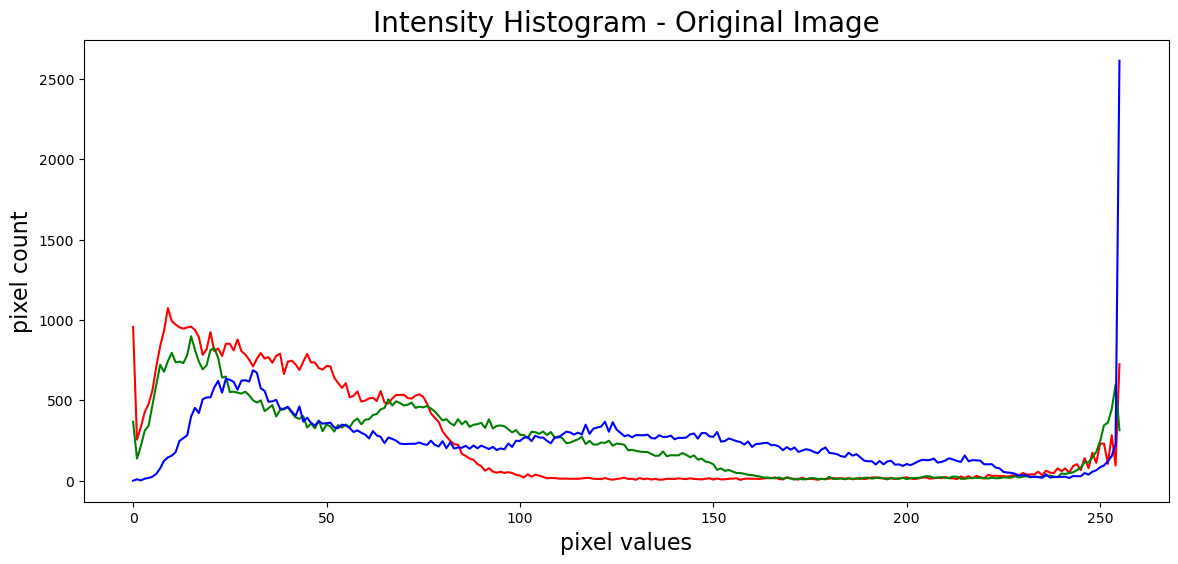

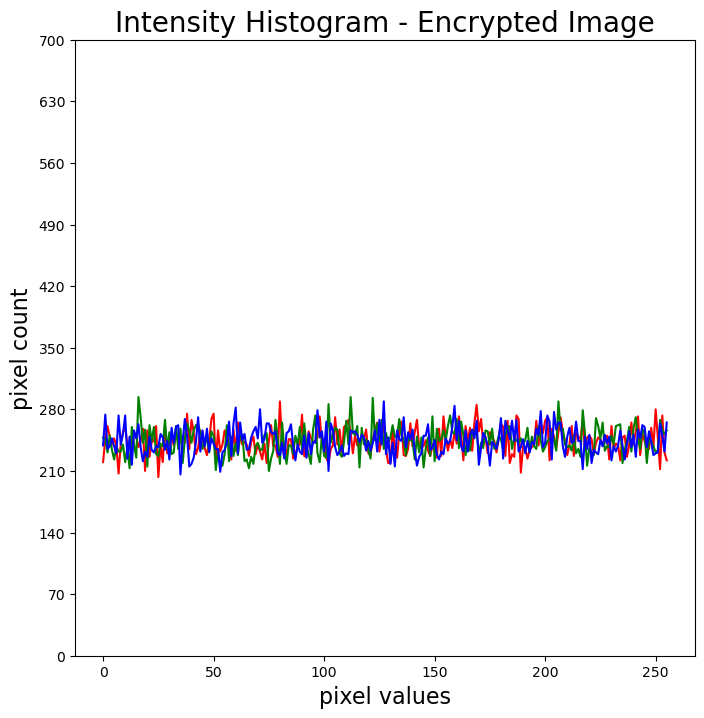

In [28]:
logistic_encryption("test.png","13!@sadhyter?",1)
logistic_decryption("test.png","13!@sadhyter?",1)

# color
img = get_image_rgb("test.png")

plt.figure(figsize=(14,6))

hist_red = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_red,color = 'red')
histogram_green = cv.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_blue = cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 

plt.show()


# color
img = get_image_rgb("test_LogisticEnc.png")


plt.figure(figsize=(8,8))
hist_red = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_red,color = 'red')
histogram_green = cv.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_blue = cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
plt.title('Intensity Histogram - Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.yticks(np.linspace(0,700,11,endpoint=True))
# plt.show()以前savefig，否则图像空白

plt.show()

In [29]:
key = "12312$%R!#@%!@#"
key_list = [ord(x) for x in key]
print(key_list)
print(sum(key_list))
G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
print(G)



[49, 50, 51, 49, 50, 36, 37, 82, 33, 35, 64, 37, 33, 64, 35]
705
[[49, 50, 51, 49], [50, 36, 37, 82], [33, 35, 64, 37]]


([<matplotlib.axis.YTick at 0x1694f4c0280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

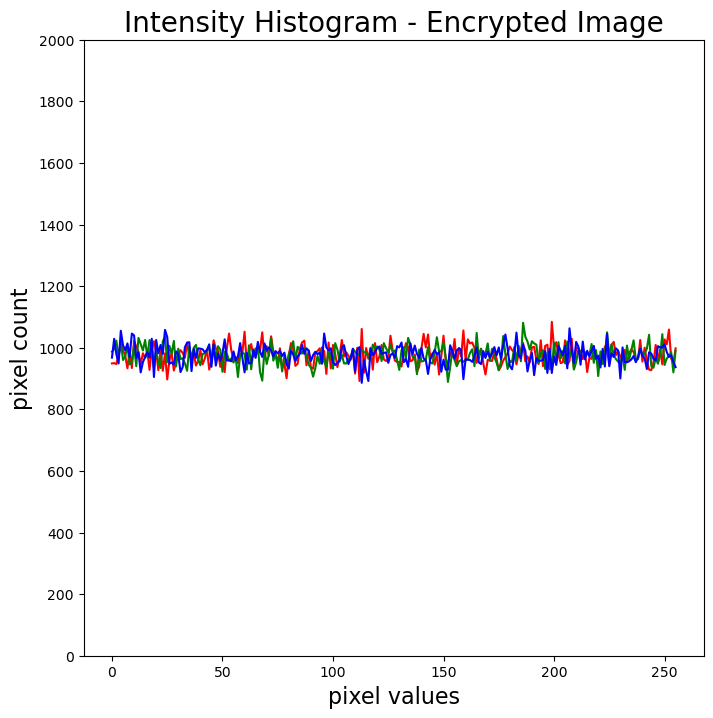

In [30]:
# logistic_encryption("graphs\solid-color\\rgb-black.png","13!@sadhyter?",1)
# logistic_decryption("graphs\solid-color\\rgb-black_LogisticEnc.png","13!@sadhyter?",1)
# logistic_encryption("graphs\solid-color\\rgb-white.png","13!@sadhyter?",1)
# logistic_decryption("graphs\solid-color\\rgb-white_LogisticEnc.png","13!@sadhyter?",1)
# logistic_encryption("graphs\solid-color\\rgb-orange.png","13!@sadhyter?",1)
# logistic_decryption("graphs\solid-color\\rgb-orange_LogisticEnc.png","13!@sadhyter?",1)
# # color
# img = get_image_rgb("test.png")

# plt.figure(figsize=(14,6))

# hist_red = cv.calcHist([img],[0],None,[256],[0,256])
# plt.plot(hist_red,color = 'red')
# histogram_green = cv.calcHist([img],[1],None,[256],[0,256]) 
# plt.plot(histogram_green, color='green') 
# histogram_blue = cv.calcHist([img],[2],None,[256],[0,256])
# plt.plot(histogram_blue, color='blue')
# plt.title('Intensity Histogram - Original Image', fontsize=20)
# plt.xlabel('pixel values', fontsize=16)
# plt.ylabel('pixel count', fontsize=16) 

# plt.show()


# # color
img = get_image_rgb("graphs\solid-color\\rgb-orange_LogisticEnc.png")


plt.figure(figsize=(8,8))
hist_red = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_red,color = 'red')
histogram_green = cv.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_blue = cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
plt.title('Intensity Histogram - Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.yticks(np.linspace(0,2000,11,endpoint=True))
# plt.show()以前savefig，否则图像空白

# plt.show()

In [31]:
l_img = get_image_rgb("graphs\solid-color\\rgb-black_LogisticEnc.png")
# cv.imshow("123",l_img)
l_img = get_image_color("graphs\solid-color\\rgb-orange_LogisticEnc.png")
cv.imshow("img",l_img)
cv.waitKey(0)
cv.destroyAllWindows()

for i in range(500):
    for j in range(500):
        print(l_img[i][j][0],' ',l_img[i][j][1],' ',l_img[i][j][2])
# print(l_img)
l_img = get_image_gray("graphs\solid-color\\rgb-black_LogisticEnc.png")
print(l_img)
print(l_img.size)

139   200   140
118   240   72
109   26   190
189   169   1
43   114   150
48   50   138
71   140   160
90   208   240
186   233   5
112   156   188
181   70   234
106   186   90
169   188   152
228   56   144
139   194   214
152   100   76
138   147   63
176   230   126
205   194   158
91   141   101
151   32   140
234   36   212
175   186   182
117   51   115
15   148   16
7   197   5
9   16   12
182   244   180
35   38   34
53   255   55
167   88   164
204   192   240
124   139   31
208   228   188
97   182   130
147   89   113
179   6   210
169   23   151
247   196   0
89   113   65
222   155   247
92   94   54
93   156   136
181   183   247
91   26   166
194   68   148
25   222   42
147   17   161
89   0   172
81   109   141
177   24   116
178   24   248
135   218   54
17   7   167
212   139   111
69   203   227
97   160   204
217   93   77
215   150   162
42   46   230
190   249   109
193   199   159
145   90   254
32   168   48
156   211   143
154   174   150
6   39   3
200   16